In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv(r"C:\Users\admin\Desktop\Excelr Assignments\Assignment 4\Salary_Data.csv")
data

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [4]:
corel = data.corr().round(2)
corel

,YearsExperience,Salary
YearsExperience,1.00,0.98
Salary,0.98,1.00


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

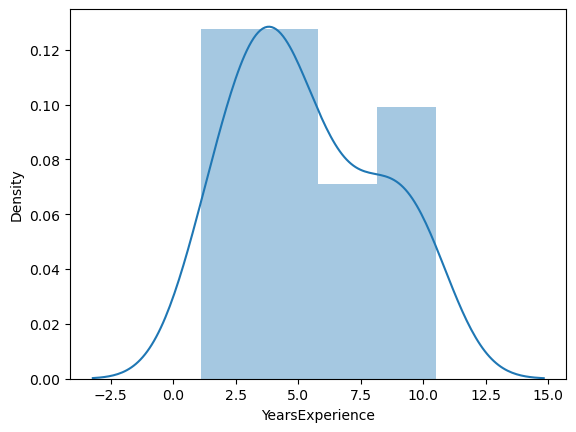

In [5]:
sns.distplot(data['YearsExperience'])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

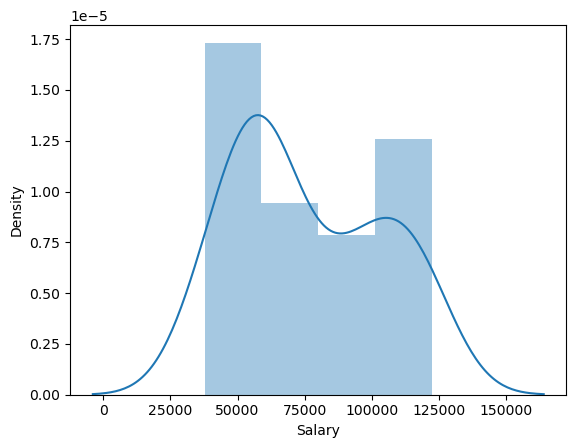

In [6]:
sns.distplot(data['Salary'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

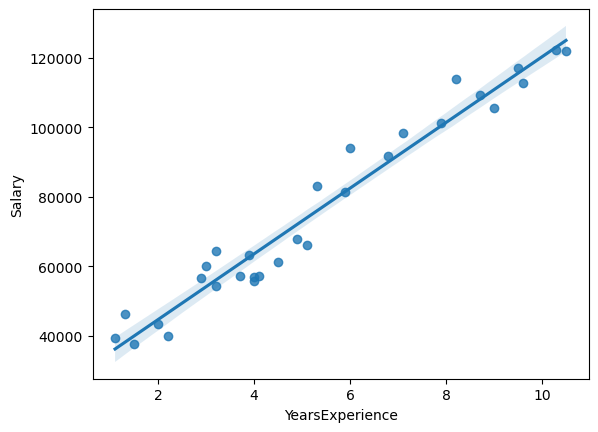

In [7]:
sns.regplot(x=data['YearsExperience'],y=data['Salary'])

In [8]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


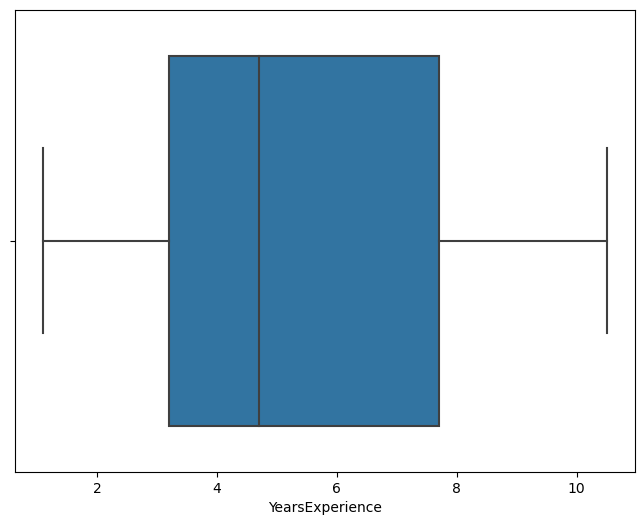

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


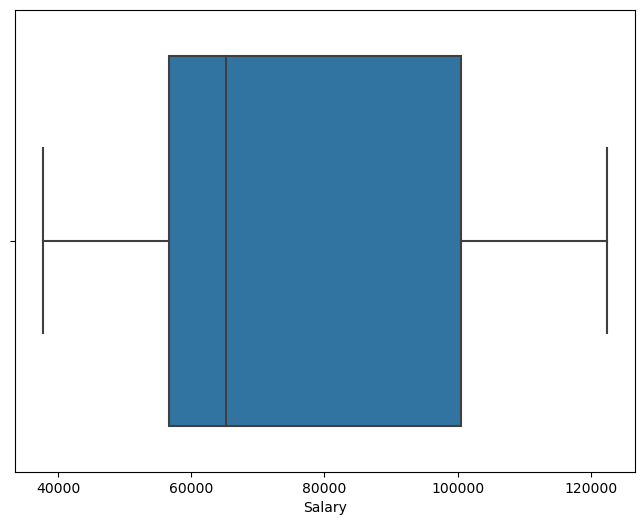

In [9]:
plt.figure(figsize = (8, 6))
plt.tight_layout()
sns.boxplot(data.YearsExperience)
plt.show()

plt.figure(figsize = (8, 6))
plt.tight_layout()
sns.boxplot(data.Salary)
plt.show()

In [10]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [11]:
model = smf.ols('Salary ~ YearsExperience', data = data).fit()

In [12]:
Bo, B1 = model.params
print("Intercept, Bo: ", Bo)
print("YearsExperience, B1: ", B1)


tvalue, pvalue = (model.tvalues, model.pvalues)
print("tvalue: ", tvalue)
print("pvalue: ", pvalue)


r_sq, r_sq_adj = (model.rsquared, model.rsquared_adj)
print("R2: ", r_sq)
print("R2_Adj: ", r_sq_adj)

Intercept, Bo:  25792.200198668703
YearsExperience, B1:  9449.962321455077
tvalue:  Intercept          11.346940
YearsExperience    24.950094
dtype: float64
pvalue:  Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64
R2:  0.9569566641435086
R2_Adj:  0.9554194021486339


In [13]:
predicted_salary = model.predict(data.YearsExperience)
pred_df = pd.DataFrame({'Salary_Actual' : data.Salary, 'Salary_Predicted' : predicted_salary})
pred_df


,Salary_Actual,Salary_Predicted
0,39343,36187.158752
1,46205,38077.151217
2,37731,39967.143681
3,43525,44692.124842
4,39891,46582.117306
5,56642,53197.090931
6,60150,54142.087163
7,54445,56032.079627
8,64445,56032.079627
9,57189,60757.060788


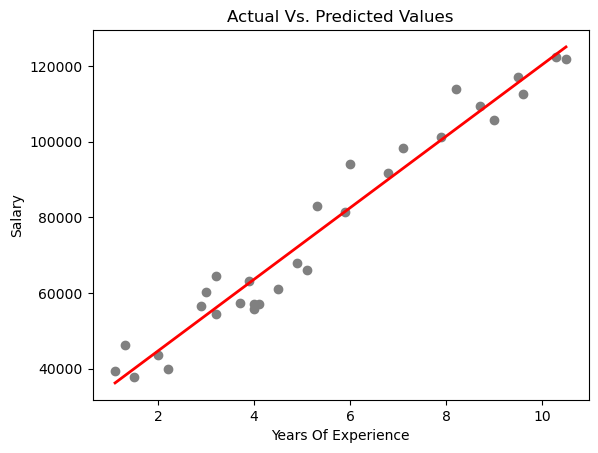

In [14]:
plt.scatter(data.YearsExperience, data.Salary,  color='gray')
plt.plot(data.YearsExperience, predicted_salary, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Years Of Experience')
plt.ylabel('Salary')
plt.show()

In [15]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(data.Salary, predicted_salary))  
print('Mean Squared Error:', metrics.mean_squared_error(data.Salary, predicted_salary))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data.Salary, predicted_salary)))
print("R^2 Score :          ", metrics.r2_score(data.Salary, predicted_salary))

Mean Absolute Error: 4644.20128944354
Mean Squared Error: 31270951.72228097
Root Mean Squared Error: 5592.043608760662
R^2 Score :           0.9569566641435086


p-value from the test: below 0.05 generally means non-normal: 0.4279759880058132
Residuals are normally distributed


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


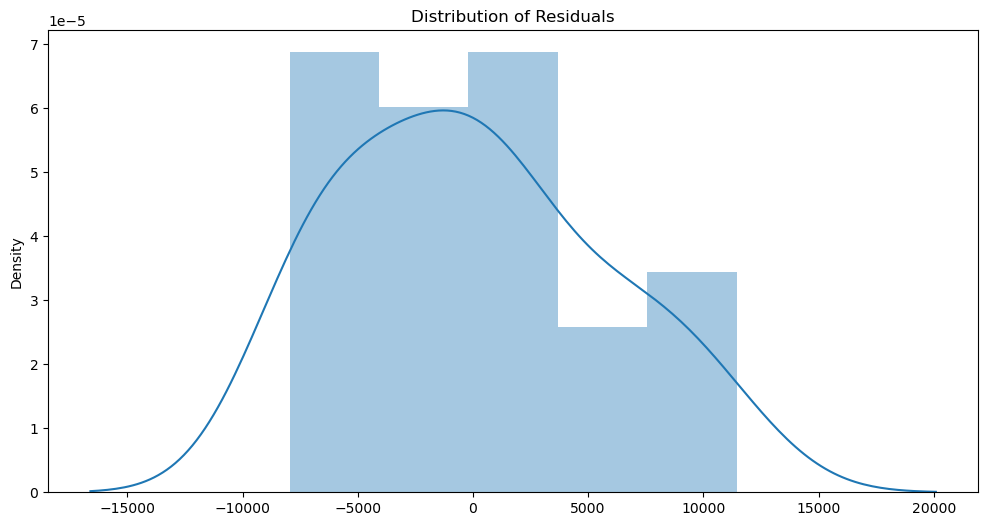

In [16]:
from statsmodels.stats.diagnostic import normal_ad
residuals = data.Salary - predicted_salary
p_value_thresh=0.05

p_value = normal_ad(residuals)[1]
print('p-value from the test: below 0.05 generally means non-normal:', p_value)

if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')


plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           1.14e-20
Time:                        10:33:01   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
data1 = pd.DataFrame.copy(data)
data1['log_YearsExperience'] = np.log(data1.YearsExperience)
data1.head()


,YearsExperience,Salary,log_YearsExperience
0,1.1,39343,0.095310
1,1.3,46205,0.262364
2,1.5,37731,0.405465
3,2.0,43525,0.693147
4,2.2,39891,0.788457


In [19]:
log_model = smf.ols('Salary ~ log_YearsExperience', data = data1).fit()

In [20]:
Bo, B1 = log_model.params
print("Intercept, Bo: ", Bo)
print("YearsExperience, B1: ", B1)


tvalue, pvalue = (log_model.tvalues, log_model.pvalues)
print("tvalue: ", tvalue)
print("pvalue: ", pvalue)

r_sq, r_sq_adj = (log_model.rsquared, log_model.rsquared_adj)
print("R2: ", r_sq)
print("R2_Adj: ", r_sq_adj)

Intercept, Bo:  14927.971770057291
YearsExperience, B1:  40581.98795977904
tvalue:  Intercept               2.895135
log_YearsExperience    12.791989
dtype: float64
pvalue:  Intercept              7.268813e-03
log_YearsExperience    3.250155e-13
dtype: float64
R2:  0.8538888828756969
R2_Adj:  0.8486706286926861


In [21]:
predicted_salary = log_model.predict(data1.log_YearsExperience)
pred_df = pd.DataFrame({'Salary_Actual' : data.Salary, 'Salary_Predicted' : predicted_salary})
pred_df

,Salary_Actual,Salary_Predicted
0,39343,18795.848339
1,46205,25575.235192
2,37731,31382.551905
3,43525,43057.262306
4,39891,46925.138875
5,56642,58136.050079
6,60150,59511.842441
7,54445,62130.943929
8,64445,62130.943929
9,57189,68022.718504


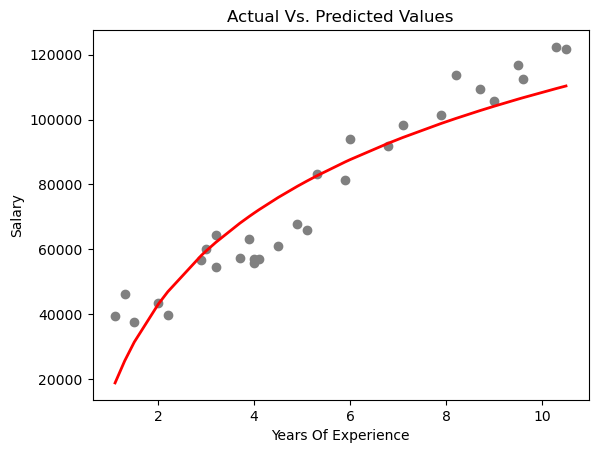

In [22]:
plt.scatter(data1.YearsExperience, data1.Salary,  color='gray')
plt.plot(data1.YearsExperience, predicted_salary, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Years Of Experience')
plt.ylabel('Salary')
plt.show()


In [23]:
print('Mean Absolute Error:', metrics.mean_absolute_error(data1.Salary, predicted_salary))  
print('Mean Squared Error:', metrics.mean_squared_error(data1.Salary, predicted_salary))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data1.Salary, predicted_salary)))
print("R^2 Score :          ", metrics.r2_score(data1.Salary, predicted_salary))

Mean Absolute Error: 8443.584664486354
Mean Squared Error: 106149618.72183882
Root Mean Squared Error: 10302.893706228306
R^2 Score :           0.8538888828756969


p-value from the test: below 0.05 generally means non-normal: 0.4374194094941122
Residuals are normally distributed


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


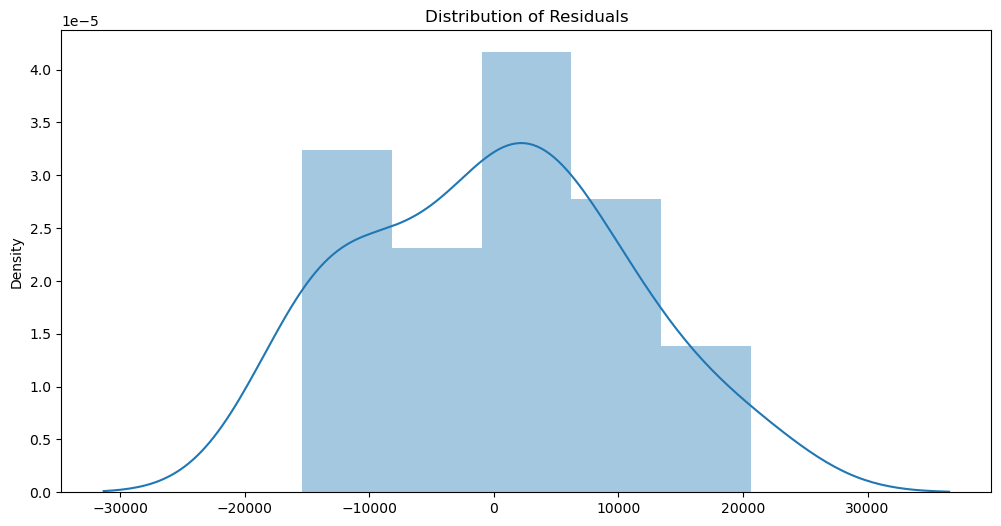

In [24]:
residuals = data1.Salary - predicted_salary
p_value_thresh=0.05

p_value = normal_ad(residuals)[1]
print('p-value from the test: below 0.05 generally means non-normal:', p_value)


if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')


plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()

In [25]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           3.25e-13
Time:                        10:33:07   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
log_YearsExperience  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
data1['log_Salary'] = np.log(data1.Salary)
data1.head()

,YearsExperience,Salary,log_YearsExperience,log_Salary
0,1.1,39343,0.095310,10.580073
1,1.3,46205,0.262364,10.740843
2,1.5,37731,0.405465,10.538237
3,2.0,43525,0.693147,10.681091
4,2.2,39891,0.788457,10.593906


In [27]:
exp_model = smf.ols('log_Salary ~ YearsExperience', data = data1).fit()

In [28]:
Bo, B1 = exp_model.params
print("Intercept, Bo: ", Bo)
print("YearsExperience, B1: ", B1)


tvalue, pvalue = (exp_model.tvalues, exp_model.pvalues)
print("tvalue: ", tvalue)
print("pvalue: ", pvalue)

r_sq, r_sq_adj = (exp_model.rsquared, exp_model.rsquared_adj)
print("R2: ", r_sq)
print("R2_Adj: ", r_sq_adj)

Intercept, Bo:  10.507401896588274
YearsExperience, B1:  0.1254528892608563
tvalue:  Intercept          273.327166
YearsExperience     19.584833
dtype: float64
pvalue:  Intercept          1.604634e-49
YearsExperience    7.027439e-18
dtype: float64
R2:  0.9319671194084195
R2_Adj:  0.9295373736730059


In [29]:
predicted_salary = exp_model.predict(data1.YearsExperience)
pred_df = pd.DataFrame({'Salary_Actual' : data1.log_Salary, 'Salary_Predicted' : predicted_salary})
pred_df

,Salary_Actual,Salary_Predicted
0,10.580073,10.645400
1,10.740843,10.670491
2,10.538237,10.695581
3,10.681091,10.758308
4,10.593906,10.783398
5,10.944506,10.871215
6,11.004597,10.883761
7,10.904946,10.908851
8,11.073567,10.908851
9,10.954117,10.971578


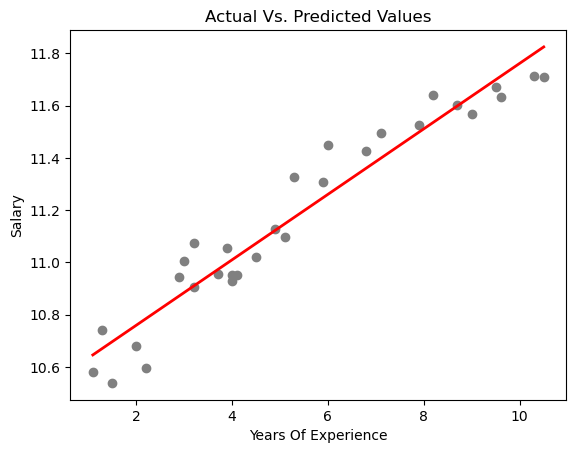

In [30]:
plt.scatter(data1.YearsExperience, data1.log_Salary,  color='gray')
plt.plot(data1.YearsExperience, predicted_salary, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Years Of Experience')
plt.ylabel('Salary')
plt.show()

In [31]:
print('Mean Absolute Error:', metrics.mean_absolute_error(data1.log_Salary, predicted_salary))  
print('Mean Squared Error:', metrics.mean_squared_error(data1.log_Salary, predicted_salary))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data1.log_Salary, predicted_salary)))
print("R^2 Score :          ", metrics.r2_score(data1.log_Salary, predicted_salary))

Mean Absolute Error: 0.07981492426092214
Mean Squared Error: 0.008944311172030291
Root Mean Squared Error: 0.0945743684728071
R^2 Score :           0.9319671194084195


In [32]:
pred_df = pd.DataFrame({'Actual': np.exp(data1.log_Salary), 'Predicted': np.exp(predicted_salary)})
pred_df

,Actual,Predicted
0,39343.0,41998.957468
1,46205.0,43066.066794
2,37731.0,44160.289228
3,43525.0,47019.029189
4,39891.0,48213.688474
5,56642.0,52639.142472
6,60150.0,53303.675386
7,54445.0,54658.014935
8,64445.0,54658.014935
9,57189.0,58196.330788


p-value from the test: below 0.05 generally means non-normal: 0.3369861234986567
Residuals are normally distributed


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


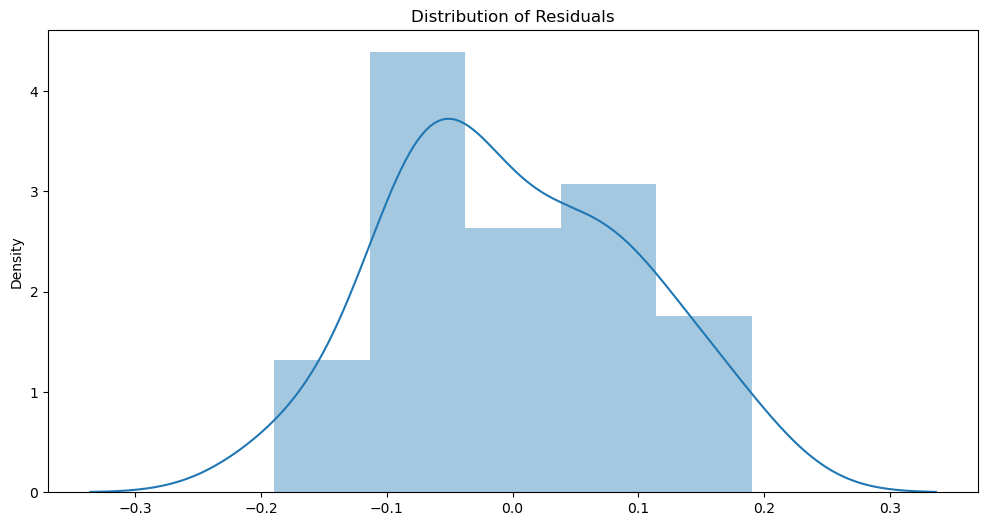

In [33]:
residuals = data1.log_Salary - predicted_salary
p_value_thresh=0.05
p_value = normal_ad(residuals)[1]
print('p-value from the test: below 0.05 generally means non-normal:', p_value)


if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')


plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()

In [34]:
exp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_Salary   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           7.03e-18
Time:                        10:33:14   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
data1['sqrt_Salary'] = np.sqrt(data1.Salary)
data1.head()

,YearsExperience,Salary,log_YearsExperience,log_Salary,sqrt_Salary
0,1.1,39343,0.095310,10.580073,198.350700
1,1.3,46205,0.262364,10.740843,214.953483
2,1.5,37731,0.405465,10.538237,194.244691
3,2.0,43525,0.693147,10.681091,208.626460
4,2.2,39891,0.788457,10.593906,199.727314


In [36]:
sqrt_model = smf.ols('sqrt_Salary ~ YearsExperience', data = data1).fit()

In [37]:
Bo, B1 = sqrt_model.params
print("Intercept, Bo: ", Bo)
print("YearsExperience, B1: ", B1)


tvalue, pvalue = (sqrt_model.tvalues, sqrt_model.pvalues)
print("tvalue: ", tvalue)
print("pvalue: ", pvalue)


r_sq, r_sq_adj = (sqrt_model.rsquared, sqrt_model.rsquared_adj)
print("R2: ", r_sq)
print("R2_Adj: ", r_sq_adj)

Intercept, Bo:  180.70022140543108
YearsExperience, B1:  17.05653205024197
tvalue:  Intercept          40.646251
YearsExperience    23.025247
dtype: float64
pvalue:  Intercept          1.920194e-26
YearsExperience    9.782891e-20
dtype: float64
R2:  0.9498353533865289
R2_Adj:  0.9480437588646192


In [38]:
predicted_salary = sqrt_model.predict(data1.YearsExperience)
pred_df = pd.DataFrame({'Salary_Actual' : data1.sqrt_Salary, 'Salary_Predicted' : predicted_salary})
pred_df

,Salary_Actual,Salary_Predicted
0,198.350700,199.462407
1,214.953483,202.873713
2,194.244691,206.285019
3,208.626460,214.813286
4,199.727314,218.224592
5,237.995798,230.164164
6,245.254969,231.869818
7,233.334524,235.281124
8,253.860198,235.281124
9,239.142217,243.809390


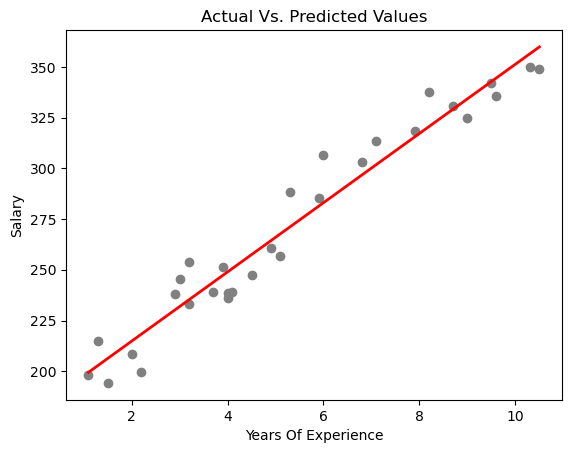

In [39]:
plt.scatter(data1.YearsExperience, data1.sqrt_Salary,  color='gray')
plt.plot(data1.YearsExperience, predicted_salary, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Years Of Experience')
plt.ylabel('Salary')
plt.show()

In [40]:
print('Mean Absolute Error:', metrics.mean_absolute_error(data1.sqrt_Salary, predicted_salary))  
print('Mean Squared Error:', metrics.mean_squared_error(data1.sqrt_Salary, predicted_salary))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data1.sqrt_Salary, predicted_salary)))
print("R^2 Score :          ", metrics.r2_score(data1.sqrt_Salary, predicted_salary))

Mean Absolute Error: 9.321657712741542
Mean Squared Error: 119.61845560327342
Root Mean Squared Error: 10.937022245715395
R^2 Score :           0.9498353533865289


In [41]:
pred_df = pd.DataFrame({'Actual': (data1.sqrt_Salary)**2, 'Predicted': (predicted_salary)**2})
pred_df

,Actual,Predicted
0,39343.0,39785.251671
1,46205.0,41157.743455
2,37731.0,42553.509262
3,43525.0,46144.747630
4,39891.0,47621.972517
5,56642.0,52975.542551
6,60150.0,53763.612294
7,54445.0,55357.207295
8,64445.0,55357.207295
9,57189.0,59443.018648


p-value from the test: below 0.05 generally means non-normal: 0.11907877807580869
Residuals are normally distributed


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


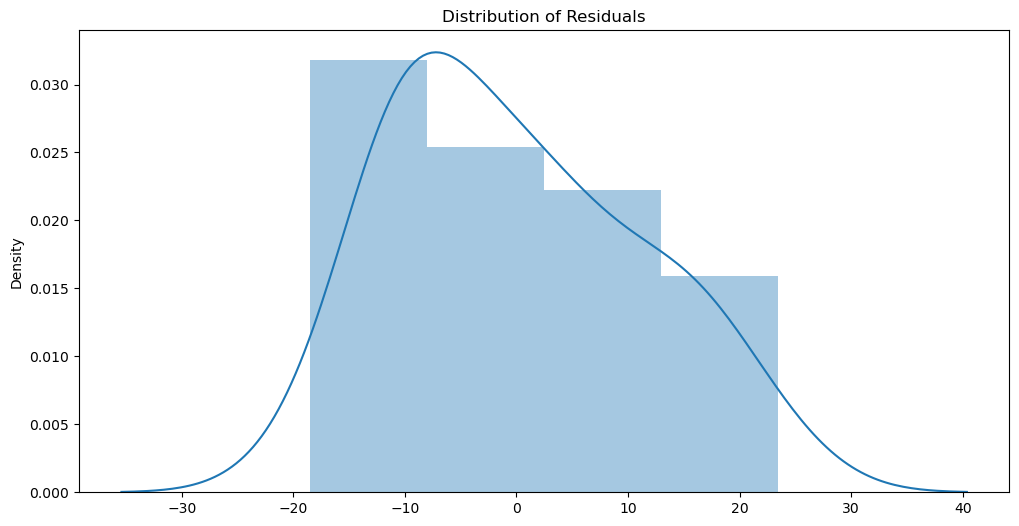

In [42]:
residuals = data1.sqrt_Salary - predicted_salary
p_value_thresh=0.05

p_value = normal_ad(residuals)[1]
print('p-value from the test: below 0.05 generally means non-normal:', p_value)


if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()

In [43]:
sqrt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sqrt_Salary   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     530.2
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           9.78e-20
Time:                        10:33:22   Log-Likelihood:                -114.33
No. Observations:                  30   AIC:                             232.7
Df Residuals:                      28   BIC:                             235.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         180.7002      4.446     40.646      0.000     171.594     189.807
YearsExperience    17.0565      0.741     23.025      0.000      15.539      18.574
==============================================================================
Omnibus:                        2.621   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                1.906
Skew:                           0.439   Prob(JB):                        0.386
Kurtosis:                       2.131   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""